## Logistic Regression Analysis on Termite Dataset

This notebook explores the use of Logistic Regression to predict termite discovery based on the initial and final weights of wood blocks. Our focus is to demonstrate how Logistic Regression can be applied to an ecological dataset for meaningful insights.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv(r'C:\Users\isabe\INDE 577\INDE-577\global_termite_microbe_wd.csv')
df.head()

,country,site,latitude,longitude,habitat_type,wood_used,wood_origin,N_pc,C_pc,P_pc,...,treatment,deployment_date,harvest_date,date_diff,initial_wt,final_wt,k_value,termite_discovery,fungal_damage,termite_damage
0,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2018-11-15T00:00:00Z,400,128.253,124.455,0.027455,0.0,NaN,NaN
1,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2020-01-23T00:00:00Z,834,118.588,73.688,0.208385,0.0,NaN,NaN
2,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,T,10/11/2017,2018-11-15T00:00:00Z,400,139.887,102.724,0.281967,0.0,NaN,NaN
3,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,T,10/11/2017,2020-01-23T00:00:00Z,834,152.744,109.133,0.147238,0.0,NaN,NaN
4,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2018-11-15T00:00:00Z,400,163.892,155.943,0.045400,0.0,NaN,NaN


## Data Exploration

Initially, we explore the dataset to understand its structure, features, and any missing values. This step is crucial for informed preprocessing.


In [3]:
# Filter the data if necessary and handle missing values
relevant_columns = ['initial_wt', 'final_wt', 'termite_discovery']
selected_data = df[relevant_columns].dropna()

# Normalizing the features
selected_data[['initial_wt', 'final_wt']] = (selected_data[['initial_wt', 'final_wt']] - selected_data[['initial_wt', 'final_wt']].mean()) / selected_data[['initial_wt', 'final_wt']].std()


## Implementing Logistic Regression

Logistic Regression is a statistical method for predicting binary classes. In our case, it will be used to predict whether termites have discovered the wood blocks based on their weights.


In [4]:
# Splitting the data into features and target
X = selected_data[['initial_wt', 'final_wt']]
y = selected_data['termite_discovery']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

accuracy, report, confusion


(0.8914092664092664,
 '              precision    recall  f1-score   support\n\n         0.0       0.90      0.98      0.94      1795\n         1.0       0.72      0.30      0.43       277\n\n    accuracy                           0.89      2072\n   macro avg       0.81      0.64      0.68      2072\nweighted avg       0.88      0.89      0.87      2072\n',
 array([[1763,   32],
        [ 193,   84]], dtype=int64))

c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


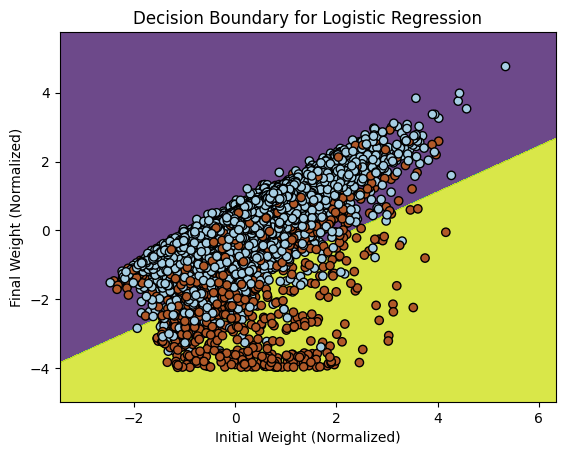

In [5]:
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Initial Weight (Normalized)')
    plt.ylabel('Final Weight (Normalized)')
    plt.title('Decision Boundary for Logistic Regression')

# Apply the function to your data and model
plot_decision_boundary(X, y, model)


## Model Interpretation

After training, the Logistic Regression model provides us with its performance metrics. The accuracy, confusion matrix, and classification report give us insight into how well the model predicts termite discovery.
